In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import requests

API_KEY = "p0HeKs520IFRt_q6hmXnw0klLpVQLFjM"

url = (
    f"https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day"
    f"/2025-11-21/2026-02-18"
    f"?adjusted=true&sort=asc&apiKey={API_KEY}"
)

response = requests.get(url)

# .json() olmadan — ham Response objesi
print(type(response))
print(response)

print("---")

# .json() ile — Python dictionary'e dönüşüyor
api_data = response.json()
print(type(api_data))        # Artık dict olmalı
print(api_data.keys())       # İçindeki key'leri görelim  

<class 'requests.models.Response'>
<Response [200]>
---
<class 'dict'>
dict_keys(['ticker', 'queryCount', 'resultsCount', 'adjusted', 'results', 'status', 'request_id', 'count'])


In [7]:
apple_df = pd.DataFrame(api_data["results"])

apple_df.head()

,v,vw,o,c,h,l,t,n
0,59030832.0,270.5152,265.95,271.49,273.33,265.6700,1763701200000,794102
1,65585796.0,275.3140,270.90,275.92,277.00,270.9000,1763960400000,755844
2,46914220.0,277.9967,275.27,276.97,280.38,275.2500,1764046800000,667295
3,33431423.0,278.0466,276.96,277.55,279.53,276.6300,1764133200000,538937
4,20135620.0,277.6285,277.26,278.85,279.00,275.9865,1764306000000,369623


In [8]:
apple_df["date"] = pd.to_datetime(apple_df["t"], unit="ms")

apple_df = apple_df.set_index("date")

apple_df.head()

,v,vw,o,c,h,l,t,n
date,,,,,,,,
2025-11-21 05:00:00,59030832.0,270.5152,265.95,271.49,273.33,265.6700,1763701200000,794102
2025-11-24 05:00:00,65585796.0,275.3140,270.90,275.92,277.00,270.9000,1763960400000,755844
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.2500,1764046800000,667295
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.6300,1764133200000,538937
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.9865,1764306000000,369623


In [9]:
apple_df = apple_df.rename(columns={
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low"
})

apple_df.head()

,v,vw,open,close,high,low,t,n
date,,,,,,,,
2025-11-21 05:00:00,59030832.0,270.5152,265.95,271.49,273.33,265.6700,1763701200000,794102
2025-11-24 05:00:00,65585796.0,275.3140,270.90,275.92,277.00,270.9000,1763960400000,755844
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.2500,1764046800000,667295
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.6300,1764133200000,538937
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.9865,1764306000000,369623


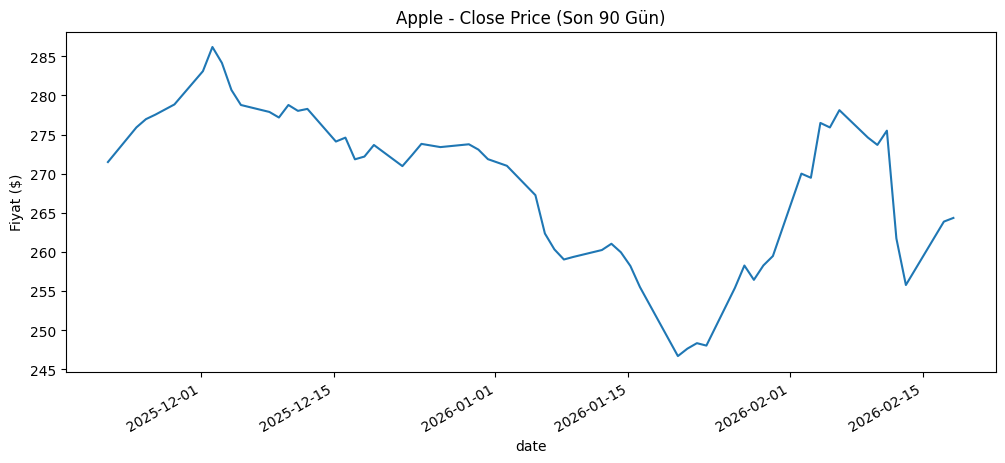

In [10]:
apple_df["close"].plot(figsize=(12, 5), title="Apple - Close Price (Son 90 Gün)", ylabel="Fiyat ($)")
plt.show()

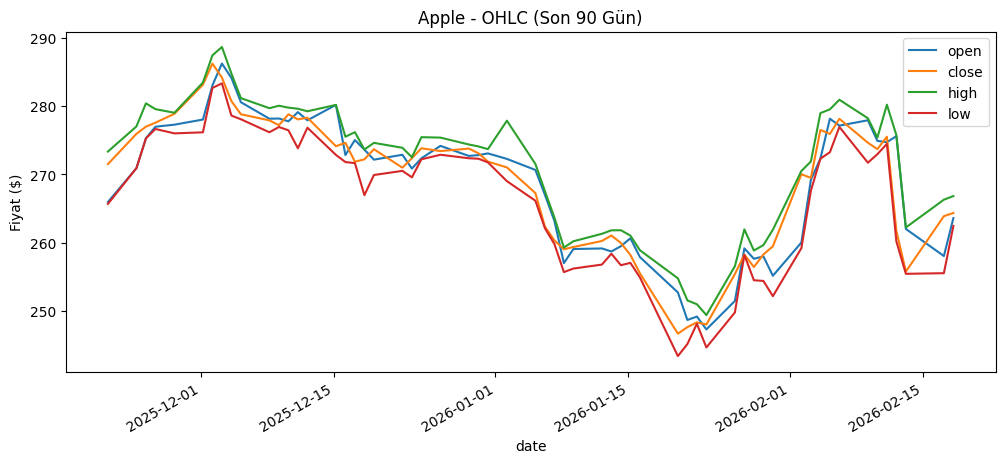

In [11]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12, 5), title="Apple - OHLC (Son 90 Gün)", ylabel="Fiyat ($)")
plt.show()

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-stock-market/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.77s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master

